In [1]:
__author__ = "@Tssp"
__date__ = "21/09/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

In [2]:
# Parameters and Constants:
delta, asc = np.loadtxt('Simulations/delta_asc_6604.txt')
delta = delta.tolist()
asc = asc.tolist()
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky = 2*np.pi/lambd
Iy = 4993 * (1e4 / Eh * to * ao**2)
Vy = alpha * Iy # a.u
Iy = Vy/alpha
wy = np.sqrt( 2 * Vy * ky**2 / mass)       
dho = np.sqrt(2 / (mass * wy))
x = dho / asc
x = np.sort(x)[::-1]
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2462366.297223966
dho [u.a]:  1620.3400676108922


In [3]:
np.sqrt(6604/4993)

1.1500659600202747

In [4]:
print(os.getcwd())
folder_path = "Simulations/ix6604_iy4993_iz50/"

/Users/tomy/PhD/Ultracold_Atoms_src


In [5]:
delta_strings = list() # Substract the deltas from the filenames
for file in os.listdir(folder_path):
    for i in range(10):
        try:
            float(file[127:140-i])
            delta_strings.append(file[127:140-i])
            break
        except:
            continue

In [6]:
Data = list()
delta_nonreaded = list()
for d in delta_strings:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix6604_iy4993_iz50_LiLi_a3Sup_{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['0.7082', '0.70815', '0.70805'] non readed


In [7]:
dic = transpose_energies(Data)

In [8]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1049 -2161.5820249836675
First trap state:  1050 0.6148952948343407


In [ ]:
%matplotlib inline

In [10]:
for key in dic.keys():
    dic[key] = np.sort(dic[key])

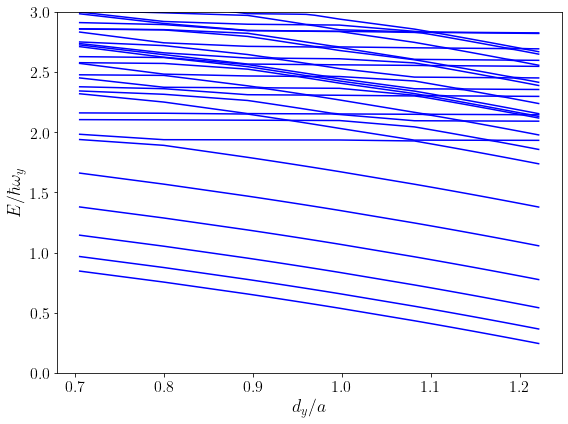

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('General_figures/Ix4993_Iy4993_Iz50/Ix4993_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

In [ ]:
%matplotlib inline

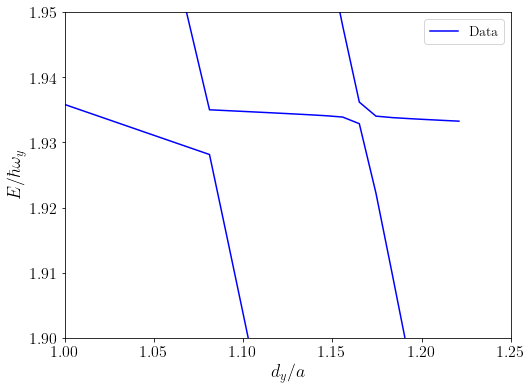

In [34]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 6, least_bound_pos + 12):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(1.9, 1.95)
ax2.set_xlim(1.0, 1.25)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.show()

In [ ]:
fig3, ax3 = plt.subplots(figsize=(8,5))
# nivel 1056:
f1056 = np.polyfit(x[(x < 1.1) & (x > 0.8)], np.array(dic['nivel_1056'])[(x < 1.1) & (x > 0.8)]/wy, deg=1)
x1056 = np.linspace(x[-1], x[0])
ax3.plot(x1056, np.polyval(f1056, x1056), 'ro', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1056']/wy, 'b', label='Adiabatic')

# nivel 1057:
f1057 = np.polyfit(x[(x < 1.1) & (x > 1)], np.array(dic['nivel_1057'])[(x < 1.1) & (x > 1)]/wy, deg=1)
x1057 = np.linspace(1.1, 1.15, num=50)
ax3.plot(x1057, np.polyval(f1057, x1057), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1057']/wy, 'b')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.17) & (x < 1.26)], np.array(dic['nivel_1058'])[(x > 1.17) & (x < 1.26)]/wy, deg=1)
x1058 = np.linspace(1.2, 1.3, num=30)
ax3.plot(x1058, np.polyval(f1058, x1058), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1058']/wy, 'b')

# nivel 1059:
f1059 = np.polyfit(x[(x > 1.257) & (x < 1.30)], np.array(dic['nivel_1059'])[(x > 1.257) & (x < 1.30)]/wy, deg=1)
x1059 = np.linspace(1, 1.4, num=200)
ax3.plot(x1059, np.polyval(f1059, x1059), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1059']/wy, 'b')

# nivel 1060:
f1060 = np.polyfit(x[(x > 1.26) & (x < 1.33)], np.array(dic['nivel_1060'])[(x > 1.26) & (x < 1.33)]/wy, deg=1)
x1060 = np.linspace(1.3, 1.4, num=70)
ax3.plot(x1060, np.polyval(f1060, x1060), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1060']/wy, 'b')

# nivel 1061:
f1061 = np.polyfit(x[(x > 1.27) & (x < 1.40)], np.array(dic['nivel_1061'])[(x > 1.27) & (x < 1.40)]/wy, deg=1)
x1061 = np.linspace(1.3, 1.42, num=70)
#ax3.plot(x1061, np.polyval(f1061, x1061), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1061']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1056, f1057), np.polyval(f1056, cross_points(f1056, f1057)), 'k*', markersize=10, label='Cross')
ax3.plot(cross_points(f1056, f1058), np.polyval(f1056, cross_points(f1056, f1058)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1059), np.polyval(f1056, cross_points(f1056, f1059)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1060), np.polyval(f1056, cross_points(f1056, f1060)), 'k*', markersize=10)
#ax3.plot(cross_points(f1056, f1061), np.polyval(f1056, cross_points(f1056, f1061)), 'k*', markersize=10)

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(1.96, 1.987)
ax3.set_xlim(1.05, x[0])
plt.tight_layout()
fig3.savefig('PRL_Sala_Results/Figures/Ix6042_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [ ]:
print(f'''Crosses between (x, E):
* 1056-1057: ({cross_points(f1056, f1057)}, {np.polyval(f1056, cross_points(f1056, f1057))})
* 1056-1058: ({cross_points(f1056, f1058)}, {np.polyval(f1056, cross_points(f1056, f1058))})
* 1056-1059: ({cross_points(f1056, f1059)}, {np.polyval(f1056, cross_points(f1056, f1059))})
* 1056-1060: ({cross_points(f1056, f1060)}, {np.polyval(f1056, cross_points(f1056, f1060))})
* 1056-1061: ({cross_points(f1056, f1061)}, {np.polyval(f1056, cross_points(f1056, f1061))})''')

In [ ]:
print(f"ICIR: asc/dy = {1/cross_points(f1056, f1058)} and {1/cross_points(f1056, f1061)}")

In [ ]:
np.savetxt('PRL_Sala_Results/ICIR_positions6042_4993_50.txt', [[1.1, 1.1], [1/cross_points(f1056, f1058), 1/cross_points(f1056, f1059)], [np.polyval(f1056, cross_points(f1056, f1058)), np.polyval(f1056, cross_points(f1056, f1059))]], header='wx/wy, asc/dy, E/hwy')

In [31]:
1/0.8

1.25

In [32]:
1/0.68

1.4705882352941175